In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Glycine_medicago_salt/medi_genes_de_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Glycine_medicago_salt/medi_ortho_de_results.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Glycine_medicago_salt/grape_genes_de_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Glycine_medicago_salt/grape_ortho_de_results.csv', index_col= 0)

In [3]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10092at3193,1301.713797,-0.286374,0.055353,-5.173619,2.296022e-07,7.690086e-07
10147at3193,771.836320,0.358900,0.071109,5.047186,4.483637e-07,1.459558e-06
10228at3193,1845.802590,-0.190621,0.057293,-3.327136,8.774342e-04,1.878592e-03
10238at3193,70.632434,0.658908,0.205713,3.203040,1.359850e-03,2.815246e-03
10488at3193,56.118573,-0.276630,0.234288,-1.180726,2.377114e-01,3.006619e-01
...,...,...,...,...,...,...
9828at3193,4398.119066,0.611485,0.042559,14.367886,8.230576e-47,1.533842e-45
9836at3193,470.954079,0.288393,0.082545,3.493769,4.762526e-04,1.059613e-03
9877at3193,2827.261961,-0.497883,0.042494,-11.716561,1.048416e-31,1.278505e-30
9919at3193,434.562910,0.918257,0.093805,9.789017,1.255097e-22,1.107044e-21


In [4]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


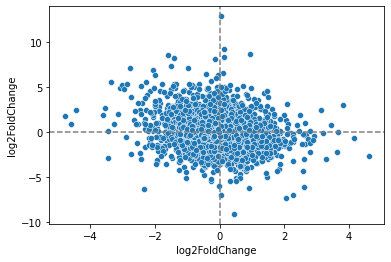

In [5]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'])
plt.axvline(0, color="grey", linestyle="--")
plt.axhline(0, color="grey", linestyle="--")

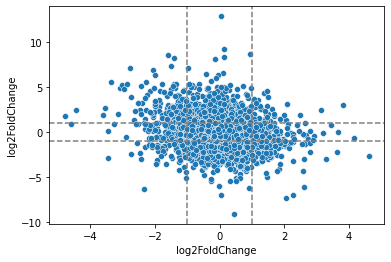

In [6]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'])
plt.axvline(1, color="grey", linestyle="--")
plt.axhline(1, color="grey", linestyle="--")
plt.axvline(-1, color="grey", linestyle="--")
plt.axhline(-1, color="grey", linestyle="--")

In [6]:
stats.spearmanr(a=trimmed_tomato_ortho['log2FoldChange'], b = trimmed_arabi_ortho['log2FoldChange'] )

SpearmanrResult(correlation=-0.17576290189184157, pvalue=2.4912323461066544e-65)

In [7]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_NM_with_NCBI/grape_to_medicago_ortholog_NM.csv')

In [8]:
arabidopsis_tomato_nm

,grape OrthoGene,medicago OrthoGene,Orthogroup,grape Symbol,medicago Symbol
0,29760_0:005643,3880_0:00298d,10009at3193,LOC104882588,LOC11432144
1,29760_0:005709,3880_0:00298d,10009at3193,LOC100267702,LOC11432144
2,29760_0:001162,3880_0:00042c,10092at3193,LOC100244127,LOC11432413
3,29760_0:004e38,3880_0:0050c6,10147at3193,LOC100266467,LOC11439919
4,29760_0:004e38,3880_0:007458,10147at3193,LOC100266467,LOC25502581
...,...,...,...,...,...
75736,29760_0:006214,3880_0:00388f,9942at3193,LOC100256637,LOC11426138
75737,29760_0:000cf8,3880_0:0073aa,9942at3193,LOC100241864,LOC11422618
75738,29760_0:00180e,3880_0:0073aa,9942at3193,LOC100261021,LOC11422618
75739,29760_0:006063,3880_0:0073aa,9942at3193,LOC100855403,LOC11422618


In [10]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'medicago Symbol')
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'grape Symbol')
arabidopsis_tomato_nm

,grape OrthoGene,medicago OrthoGene,Orthogroup,grape Symbol,medicago Symbol
0,29760_0:005643,3880_0:00298d,10009at3193,LOC104882588,LOC11432144
2,29760_0:001162,3880_0:00042c,10092at3193,LOC100244127,LOC11432413
3,29760_0:004e38,3880_0:0050c6,10147at3193,LOC100266467,LOC11439919
5,29760_0:005012,3880_0:006fc8,10228at3193,LOC100254135,LOC25502274
6,29760_0:001d16,3880_0:003883,10488at3193,LOC100241432,LOC11445193
...,...,...,...,...,...
75728,29760_0:00508d,3880_0:002d26,9828at3193,LOC100251827,LOC25488891
75729,29760_0:000e78,3880_0:002354,9836at3193,LOC100252520,LOC11432476
75730,29760_0:00354e,3880_0:002d72,9877at3193,LOC100255795,LOC11445289
75732,29760_0:002a0e,3880_0:00602c,9919at3193,LOC100241131,LOC11431644


In [11]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['grape Symbol','medicago Symbol']], right_on= 'medicago Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'grape Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
21386,31.149518,-0.714431,0.457132,-1.562854,1.180869e-01,1.748064e-01,LOC100252631,LOC11432805
69200,633.257272,0.217117,0.258116,0.841159,4.002590e-01,4.880336e-01,LOC100267950,LOC11423147
6361,344.241423,-0.042212,0.171986,-0.245440,8.061161e-01,8.485883e-01,LOC100256006,LOC11434621
34310,806.891536,2.931826,0.300105,9.769339,1.524432e-22,3.170435e-21,LOC100261092,LOC25481846
68602,83.529436,-0.758143,0.305858,-2.478746,1.318453e-02,2.524561e-02,LOC104880588,LOC25481847
...,...,...,...,...,...,...,...,...
39774,98.111345,-0.244367,0.341673,-0.715208,4.744808e-01,5.597078e-01,LOC100264541,LOC25479704
66233,832.658028,-1.343911,0.248972,-5.397828,6.745245e-08,3.291254e-07,LOC100262553,LOC25494380
56560,932.032538,2.305578,0.269312,8.561006,1.118864e-17,1.582861e-16,LOC100248921,LOC25494378
21007,598.932000,-1.110845,0.323532,-3.433492,5.958604e-04,1.515651e-03,LOC100240996,LOC11409691


In [12]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['grape Symbol','medicago Symbol']], right_on= 'grape Symbol')
tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'medicago Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
17331,685.902834,-0.173569,0.072693,-2.387694,1.695446e-02,2.808464e-02,LOC100257674,LOC11427264
14249,1471.143446,0.363540,0.056144,6.475146,9.472016e-11,3.927595e-10,LOC100254292,LOC25485777
46829,273.220138,-2.558832,0.137198,-18.650658,1.247323e-77,3.250444e-76,LOC100266436,LOC11436423
52814,449.079611,0.068360,0.090599,0.754538,4.505264e-01,5.206522e-01,LOC100256140,LOC25488435
56417,312.929264,-0.124904,0.105309,-1.186073,2.355934e-01,2.976163e-01,LOC100250986,LOC25489786
...,...,...,...,...,...,...,...,...
66777,245.215499,-0.304473,0.119551,-2.546811,1.087123e-02,1.870617e-02,LOC100253502,LOC11446732
57843,341.350680,0.007958,0.102697,0.077490,9.382334e-01,9.514033e-01,LOC104877790,LOC25483066
73841,797.200038,0.275706,0.067926,4.058949,4.929418e-05,1.209640e-04,LOC100263890,LOC11441712
27427,828.061665,-0.237231,0.070510,-3.364527,7.667485e-04,1.601305e-03,LOC100260359,LOC25502432


In [13]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
17331,685.902834,-0.173569,0.072693,-2.387694,1.695446e-02,2.808464e-02,LOC100257674,LOC11427264
14249,1471.143446,0.363540,0.056144,6.475146,9.472016e-11,3.927595e-10,LOC100254292,LOC25485777
46829,273.220138,-2.558832,0.137198,-18.650658,1.247323e-77,3.250444e-76,LOC100266436,LOC11436423
52814,449.079611,0.068360,0.090599,0.754538,4.505264e-01,5.206522e-01,LOC100256140,LOC25488435
56417,312.929264,-0.124904,0.105309,-1.186073,2.355934e-01,2.976163e-01,LOC100250986,LOC25489786
...,...,...,...,...,...,...,...,...
66777,245.215499,-0.304473,0.119551,-2.546811,1.087123e-02,1.870617e-02,LOC100253502,LOC11446732
57843,341.350680,0.007958,0.102697,0.077490,9.382334e-01,9.514033e-01,LOC104877790,LOC25483066
73841,797.200038,0.275706,0.067926,4.058949,4.929418e-05,1.209640e-04,LOC100263890,LOC11441712
27427,828.061665,-0.237231,0.070510,-3.364527,7.667485e-04,1.601305e-03,LOC100260359,LOC25502432


In [14]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['medicago Symbol'].isin(tomato_genes_trimmed['medicago Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['grape Symbol'].isin(arabi_genes_trimmed['grape Symbol'])]


In [15]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
17331,685.902834,-0.173569,0.072693,-2.387694,1.695446e-02,2.808464e-02,LOC100257674,LOC11427264
14249,1471.143446,0.363540,0.056144,6.475146,9.472016e-11,3.927595e-10,LOC100254292,LOC25485777
46829,273.220138,-2.558832,0.137198,-18.650658,1.247323e-77,3.250444e-76,LOC100266436,LOC11436423
52814,449.079611,0.068360,0.090599,0.754538,4.505264e-01,5.206522e-01,LOC100256140,LOC25488435
56417,312.929264,-0.124904,0.105309,-1.186073,2.355934e-01,2.976163e-01,LOC100250986,LOC25489786
...,...,...,...,...,...,...,...,...
66777,245.215499,-0.304473,0.119551,-2.546811,1.087123e-02,1.870617e-02,LOC100253502,LOC11446732
57843,341.350680,0.007958,0.102697,0.077490,9.382334e-01,9.514033e-01,LOC104877790,LOC25483066
73841,797.200038,0.275706,0.067926,4.058949,4.929418e-05,1.209640e-04,LOC100263890,LOC11441712
27427,828.061665,-0.237231,0.070510,-3.364527,7.667485e-04,1.601305e-03,LOC100260359,LOC25502432


In [16]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('medicago Symbol')
          .reindex(arabi_genes_trimmed.set_index('medicago Symbol').index)
          .reset_index()
       )

In [17]:
tomato_genes_trimmed

,medicago Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol
0,LOC11423147,232.938127,0.215725,0.116620,1.849810,6.434097e-02,9.409600e-02,LOC100267950
1,LOC11434621,592.622449,0.185026,0.082179,2.251493,2.435434e-02,3.910444e-02,LOC100256006
2,LOC25481846,1669.091386,-0.212815,0.052415,-4.060216,4.902732e-05,1.203609e-04,LOC100261092
3,LOC25481847,359.000956,-0.327664,0.100058,-3.274755,1.057536e-03,2.167614e-03,LOC104880588
4,LOC11420842,573.349411,0.436136,0.082954,5.257546,1.459904e-07,4.713374e-07,LOC100253817
...,...,...,...,...,...,...,...,...
8165,LOC25480527,1480.489127,0.155057,0.059222,2.618206,8.839341e-03,1.545689e-02,LOC100262851
8166,LOC25494380,1921.148210,0.769048,0.050303,15.288369,9.141139e-53,1.587276e-51,LOC100262553
8167,LOC25494378,1388.901743,-0.263140,0.056803,-4.632531,3.612226e-06,1.016685e-05,LOC100248921
8168,LOC11409691,1278.420860,1.793639,0.060289,29.750909,1.687843e-194,1.537104e-192,LOC100240996


In [18]:
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
69200,633.257272,0.217117,0.258116,0.841159,4.002590e-01,4.880336e-01,LOC100267950,LOC11423147
6361,344.241423,-0.042212,0.171986,-0.245440,8.061161e-01,8.485883e-01,LOC100256006,LOC11434621
34310,806.891536,2.931826,0.300105,9.769339,1.524432e-22,3.170435e-21,LOC100261092,LOC25481846
68602,83.529436,-0.758143,0.305858,-2.478746,1.318453e-02,2.524561e-02,LOC104880588,LOC25481847
32085,210.456872,-0.023334,0.306017,-0.076250,9.392199e-01,9.532151e-01,LOC100253817,LOC11420842
...,...,...,...,...,...,...,...,...
21041,2490.087737,0.452994,0.254330,1.781127,7.489168e-02,1.177030e-01,LOC100262851,LOC25480527
66233,832.658028,-1.343911,0.248972,-5.397828,6.745245e-08,3.291254e-07,LOC100262553,LOC25494380
56560,932.032538,2.305578,0.269312,8.561006,1.118864e-17,1.582861e-16,LOC100248921,LOC25494378
21007,598.932000,-1.110845,0.323532,-3.433492,5.958604e-04,1.515651e-03,LOC100240996,LOC11409691


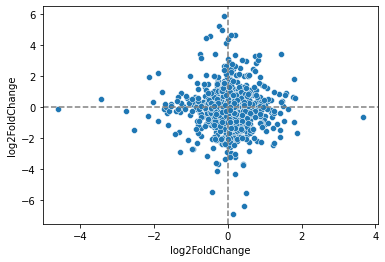

In [19]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="grey", linestyle="--")
plt.axhline(0, color="grey", linestyle="--")

In [76]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

SignificanceResult(statistic=0.16998724263065582, pvalue=5.557071864182146e-51)

In [77]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [84]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [89]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

32

In [86]:
up_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10488at3193,52.714341,3.370811,0.479025,7.036822,1.966743e-12,1.061378e-11
11017at3193,51.827406,3.575398,0.513246,6.966247,3.255071e-12,1.718912e-11
110288at3193,2128.608223,2.203703,0.162992,13.520321,1.186568e-41,3.920125e-40
110291at3193,2788.444150,2.899573,0.259505,11.173492,5.497629e-29,9.039025e-28
110343at3193,304.120376,3.624832,0.235374,15.400305,1.628999e-53,9.112053e-52
...,...,...,...,...,...,...
889664at3193,190.038296,2.598525,0.223327,11.635538,2.718709e-31,5.042490e-30
889948at3193,494.261923,3.276030,0.188725,17.358789,1.692554e-67,1.672307e-65
890015at3193,231.882582,2.405092,0.238361,10.090105,6.110388e-24,7.573156e-23
9557at3193,351.097368,2.153510,0.180711,11.916898,9.664018e-33,1.949771e-31


In [85]:
up_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
112319at3193,46.429911,2.189897,0.430789,5.083459,3.706227e-07,4.818095e-06
114038at3193,1593.705104,6.541322,0.484945,13.488783,1.820817e-41,1.182138e-38
114515at3193,1533.063783,5.641658,0.328830,17.156747,5.596189e-66,1.544128e-62
114666at3193,70.035145,2.159363,0.342366,6.307183,2.841591e-10,7.213961e-09
117013at3193,6275.816200,2.783008,0.147893,18.817687,5.409497e-79,2.985231e-75
...,...,...,...,...,...,...
888729at3193,1128.091715,2.465255,0.225902,10.912954,9.995425e-28,2.081500e-25
888811at3193,68.681874,2.301733,0.515129,4.468269,7.885509e-06,6.973747e-05
889278at3193,6791.657344,2.063813,0.493041,4.185885,2.840570e-05,2.097082e-04


In [80]:
up

,arabidopsis Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol
13,AT1G01240,773.081084,3.520915,0.253350,13.897441,6.564710e-44,2.675410e-42,LOC101256522
15,AT1G01290,30.686129,3.373121,0.548537,6.149301,7.782526e-10,3.477970e-09,LOC101247025
16,AT1G01300,395.276457,3.521809,0.215713,16.326350,6.410655e-60,5.025135e-58,LOC101254425
69,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
93,AT1G02960,32.808280,3.367007,0.571278,5.893813,3.773834e-09,1.559744e-08,LOC101258897
...,...,...,...,...,...,...,...,...
7659,AT5G66030,700.040727,2.350113,0.184598,12.730958,3.979269e-37,1.152549e-35,LOC101254258
7660,AT5G66050,688.180123,4.720131,0.313008,15.079905,2.195843e-51,1.229472e-49,LOC101247280
7672,AT5G66540,272.875924,2.031807,0.289682,7.013925,2.317239e-12,1.329363e-11,LOC101253879
7673,AT5G66590,579.079400,2.223749,0.307813,7.224353,5.034947e-13,3.052308e-12,LOC101257731


In [90]:
up_arabi

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
37410,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300
46632,244.041301,4.909129,0.676055,7.261436,3.830035e-13,1.623916e-11,LOC101256498,AT1G03070
14336,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360
52742,272.881762,4.077672,0.438625,9.296489,1.451593e-20,1.559438e-18,LOC101244780,AT1G03470
38408,427.962919,2.323308,0.354202,6.559274,5.407028e-11,1.564999e-09,LOC101248918,AT1G04620
...,...,...,...,...,...,...,...,...
51095,352.905914,2.092255,0.297903,7.023265,2.167433e-12,8.127177e-11,LOC101266226,AT5G58370
43879,431.894437,3.028377,0.377604,8.019988,1.057555e-15,6.475122e-14,LOC101265201,AT5G60040
28383,1486.612708,2.066535,0.256095,8.069418,7.063405e-16,4.465245e-14,LOC101259425,AT5G61380
16939,43.017272,2.709623,0.500485,5.413991,6.163523e-08,9.602265e-07,LOC101265213,AT5G62370


In [82]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)

,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,padj_x,tomato Symbol_x,arabidopsis Symbol,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y,tomato Symbol_y
0,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
1,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360,85.080935,2.699202,0.411189,6.564390,5.224628e-11,2.619566e-10,LOC101267058
2,401.994829,3.122644,0.242442,12.879967,5.836084e-38,2.322629e-35,LOC101255183,AT1G15510,120.618031,2.120185,0.341672,6.205326,5.458366e-10,2.485135e-09,LOC101255183
3,1760.048535,4.254156,0.291552,14.591391,3.186328e-48,2.936621e-45,LOC101255185,AT1G16030,18443.123120,2.455365,0.650977,3.771815,1.620643e-04,3.705332e-04,LOC101255185
4,2471.881822,2.312580,0.490882,4.711073,2.464156e-06,2.566915e-05,LOC101258429,AT1G28330,5326.247786,3.191949,0.300080,10.636989,2.005040e-26,3.162229e-25,LOC101258429
5,69.046406,2.340967,0.540501,4.331110,1.483596e-05,1.217397e-04,LOC101257826,AT1G30960,203.148052,2.427976,0.240163,10.109688,5.004351e-24,6.788302e-23,LOC101257826
6,316.908410,2.510030,0.251559,9.977910,1.904357e-23,2.733377e-21,LOC101244367,AT1G48460,119.503515,2.786809,0.383479,7.267182,3.670655e-13,2.248657e-12,LOC101244367
7,1164.064943,2.794628,0.526201,5.310950,1.090554e-07,1.591390e-06,LOC101256536,AT1G59860,627.619958,3.931761,1.058001,3.716215,2.022296e-04,4.556350e-04,LOC101256536
8,175.944756,6.525599,0.631996,10.325375,5.410687e-25,8.772828e-23,LOC101256908,AT1G68050,636.987165,5.521131,0.434430,12.708905,5.276819e-37,1.509383e-35,LOC101256908
9,64.288553,2.746667,0.456799,6.012862,1.822759e-09,3.935676e-08,LOC101262206,AT1G68930,46.801826,5.570382,0.752398,7.403507,1.326338e-13,8.560779e-13,LOC101262206
